# Projet 6 Machine Learning

## Détection races de chiens


Dans ce projet nous allons mettre au point des algorithmes de deep learning capables de détecter des races de chiens présents sur une image. Les données consisteront en des images fournies par une association de protection des animaux, où chaque race correspondra à un label.

Dans un premier temps plusieurs réseaux de neurones convolutionnels from scratch (CNN) seront entraînés puis testés. Ensuite on jugera de l'intérêt du transfert learning (réseau pré entraîné sur des données existantes) en comparant ses résultats à ceux de réseaux convolutionnels classiques.

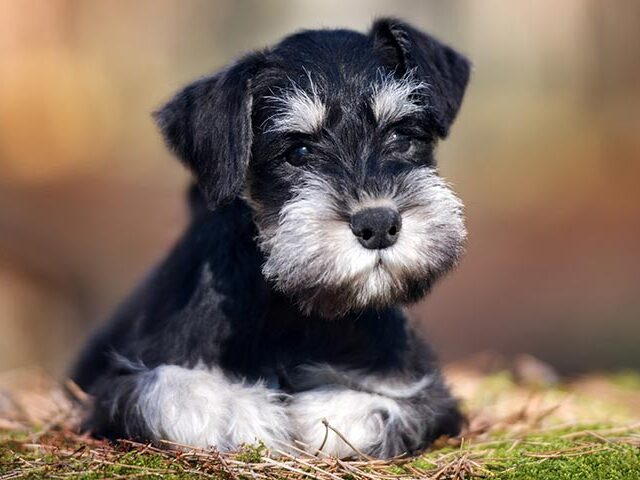

## Préparation des données

On prépare nos données afin de les fournir à nos modèles CNNs

In [2]:
# Import des librairies nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras import regularizers
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [33]:
# Création d'un dossier contenant les images de 6 races de chiens qui représenteront notre jeu de données initial

%mkdir echantillon

In [34]:
cp -R '/kaggle/input/stanford-dogs-dataset/images/Images/n02093256-Staffordshire_bullterrier' '/root/echantillon'

In [35]:
cp -R '/kaggle/input/stanford-dogs-dataset/images/Images/n02098105-soft-coated_wheaten_terrier' '/root/echantillon'

In [36]:
cp -R '/kaggle/input/stanford-dogs-dataset/images/Images/n02104029-kuvasz/' '/root/echantillon'

In [37]:
cp -R '/kaggle/input/stanford-dogs-dataset/images/Images/n02096177-cairn' '/root/echantillon'

In [38]:
cp -R '/kaggle/input/stanford-dogs-dataset/images/Images/n02097130-giant_schnauzer' '/root/echantillon'

In [39]:
cp -R '/kaggle/input/stanford-dogs-dataset/images/Images/n02091467-Norwegian_elkhound' '/root/echantillon'

In [13]:
!pip install split-folders

In [40]:
# Division du jeu de données en train/val/test

import splitfolders

splitfolders.ratio('/root/echantillon', output="/root/echantillon/output", seed=1337, ratio=(.8, .1,.1))

Copying files: 1011 files [00:00, 5533.71 files/s]


In [41]:
train_dataset = tf.keras.utils.image_dataset_from_directory (
            '/root/echantillon/output/train',
            image_size=(180, 180),
            batch_size=32)
val_dataset = tf.keras.utils.image_dataset_from_directory(
            '/root/echantillon/output/val',
            image_size=(180, 180),
            batch_size=32)
test_dataset = tf.keras.utils.image_dataset_from_directory(
            '/root/echantillon/output/test',
            image_size=(180, 180),
            batch_size=32)

Found 806 files belonging to 6 classes.
Found 98 files belonging to 6 classes.
Found 107 files belonging to 6 classes.


## CNNs classiques

Différents CNNs seront testés pour notre classification. Au fur et à mesure des layers seront ajoutés à nos modèles pour en faire des modèles de plus en plus profonds. 

Nous verrons si les modèles les plus profonds donnent les meilleurs résultats. La métrique accuracy a été choisie pour mesurer l'efficacité des différents modèles.

In [42]:
# on teste dans un premier temps un modèle assez simple

inputs = keras.Input(shape=(180, 180,3))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(128)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(6, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [43]:
from tensorflow import keras

callbacks = [
keras.callbacks.ModelCheckpoint(
                                filepath="dogs_classification",
                                monitor="val_loss")]

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer= 'adam',
metrics=["accuracy"])

In [46]:
history = model.fit(train_dataset, epochs=20,validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/20


2022-06-04 07:43:24.944962: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-04 07:43:26.152580: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


26/26 [==============================] - 8s 45ms/step - loss: 10.6949 - accuracy: 0.2196 - val_loss: 2.3862 - val_accuracy: 0.2653


2022-06-04 07:43:33.380822: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/20
26/26 [==============================] - 1s 37ms/step - loss: 1.6989 - accuracy: 0.3759 - val_loss: 1.6946 - val_accuracy: 0.2755
Epoch 3/20
26/26 [==============================] - 1s 38ms/step - loss: 1.0801 - accuracy: 0.6166 - val_loss: 1.7430 - val_accuracy: 0.2653
Epoch 4/20
26/26 [==============================] - 1s 36ms/step - loss: 0.6766 - accuracy: 0.8251 - val_loss: 1.7251 - val_accuracy: 0.3265
Epoch 5/20
26/26 [==============================] - 1s 36ms/step - loss: 0.3839 - accuracy: 0.9169 - val_loss: 1.7074 - val_accuracy: 0.2959
Epoch 6/20
26/26 [==============================] - 1s 37ms/step - loss: 0.1910 - accuracy: 0.9851 - val_loss: 1.7035 - val_accuracy: 0.2857
Epoch 7/20
26/26 [==============================] - 1s 35ms/step - loss: 0.0920 - accuracy: 0.9975 - val_loss: 1.7454 - val_accuracy: 0.3878
Epoch 8/20
26/26 [==============================] - 1s 36ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 1.7048 - val_accuracy: 0.3878
Epoch 9/20
26

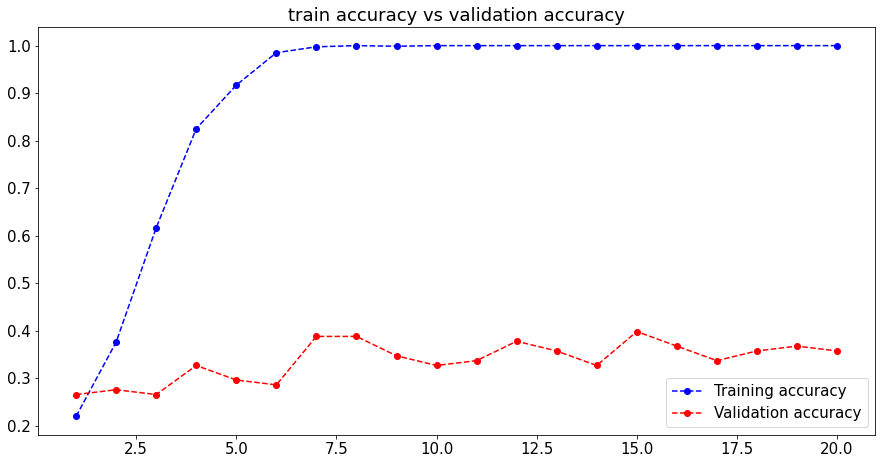

<Figure size 432x288 with 0 Axes>

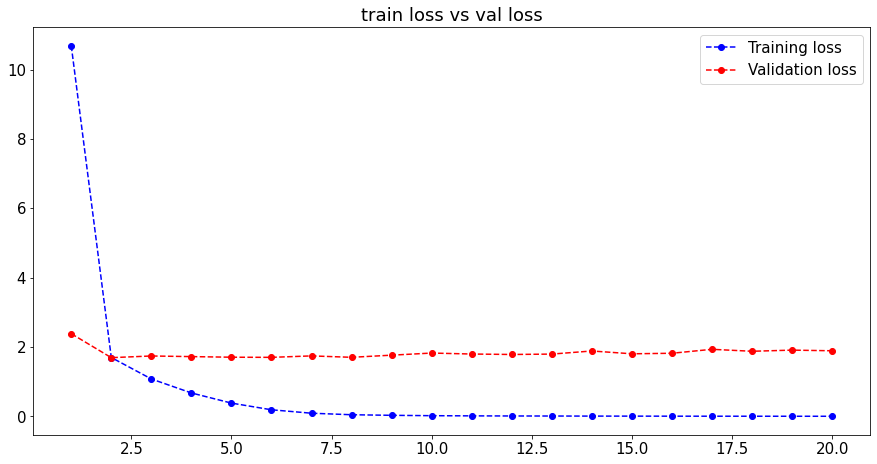

In [51]:
import matplotlib.pyplot as plt
plt.rc('font', size=15) 
fig = plt.figure(figsize=(15,7.5))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "ro--", label="Validation accuracy")
plt.title("train accuracy vs validation accuracy")
plt.legend()
plt.figure()
fig = plt.figure(figsize=(15,7.5))
plt.plot(epochs, loss, "bo--", label="Training loss")
plt.plot(epochs, val_loss, "ro--", label="Validation loss")
plt.title("train loss vs val loss")
plt.legend()
plt.show()

On voit que le premier modèle overfit quasiment dès le début de l'apprentissage. L'accuracy sur les données d'entraînement atteignent très rapidement les 100% tandis que sur le val set elle stagnent à un peu moins de 40%.

In [52]:
data_augmentation = keras.Sequential (
            [
            layers.RandomFlip("horizontal_and_vertical"),
            layers.RandomRotation(0.2),
            layers.RandomZoom(0.1),
            layers.RandomTranslation(height_factor=0.1, width_factor=0.1)])

L'augmentation des données permet de générer plus de données afin de prévenir le risque de surapprentissage du modèle. Cela consiste à appliquer des transformations aléatoires à nos images (rotation par ex) et ainsi exposer notre modèle à davantage d'aspects des données d'entraînement pour améliorer son apprentissage.


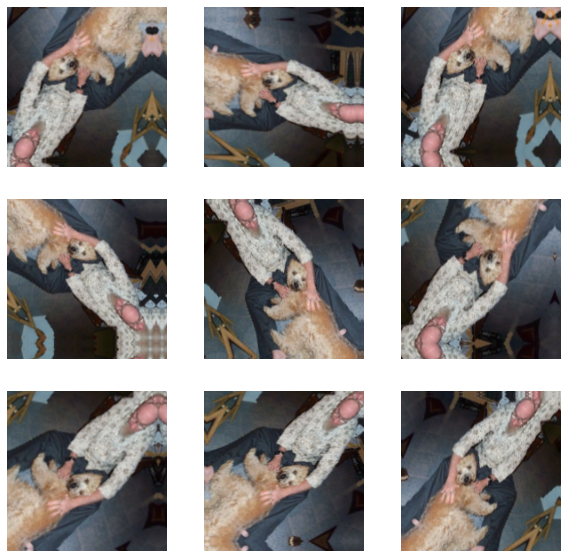

In [53]:
# Aperçu des transformations appliquées par l'augmentation des données
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [61]:
# On ajoute l'augmentation des données à notre premier modèle
inputs = keras.Input(shape=(180, 180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(128)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(6, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [62]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 89, 89, 128)       4224      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1013888)           0   

In [55]:
callbacks = [
keras.callbacks.ModelCheckpoint(
                                filepath="dogs_classification",
                                    save_best_only=True,
                                monitor="val_loss")]

In [57]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer= 'adam', metrics=["accuracy"])

In [58]:
 history = model.fit(train_dataset, epochs=20,validation_data=val_dataset, callbacks=callbacks)

Epoch 1/20
26/26 [==============================] - 2s 43ms/step - loss: 3.3227 - accuracy: 0.1737 - val_loss: 1.8600 - val_accuracy: 0.2245
Epoch 2/20
26/26 [==============================] - 2s 39ms/step - loss: 1.7339 - accuracy: 0.2705 - val_loss: 1.6550 - val_accuracy: 0.3061
Epoch 3/20
26/26 [==============================] - 1s 39ms/step - loss: 1.6049 - accuracy: 0.3015 - val_loss: 1.6567 - val_accuracy: 0.3163
Epoch 4/20
26/26 [==============================] - 1s 40ms/step - loss: 1.5896 - accuracy: 0.3176 - val_loss: 1.7859 - val_accuracy: 0.3367
Epoch 5/20
26/26 [==============================] - 1s 38ms/step - loss: 1.5328 - accuracy: 0.3412 - val_loss: 1.6654 - val_accuracy: 0.3469
Epoch 6/20
26/26 [==============================] - 1s 38ms/step - loss: 1.5249 - accuracy: 0.3412 - val_loss: 1.6856 - val_accuracy: 0.3469
Epoch 7/20
26/26 [==============================] - 1s 40ms/step - loss: 1.4906 - accuracy: 0.3685 - val_loss: 1.7693 - val_accuracy: 0.3367
Epoch 8/20
26

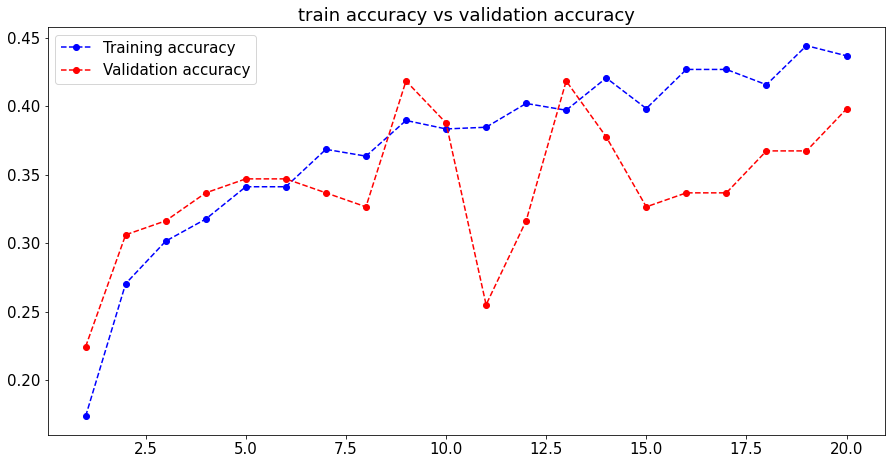

<Figure size 432x288 with 0 Axes>

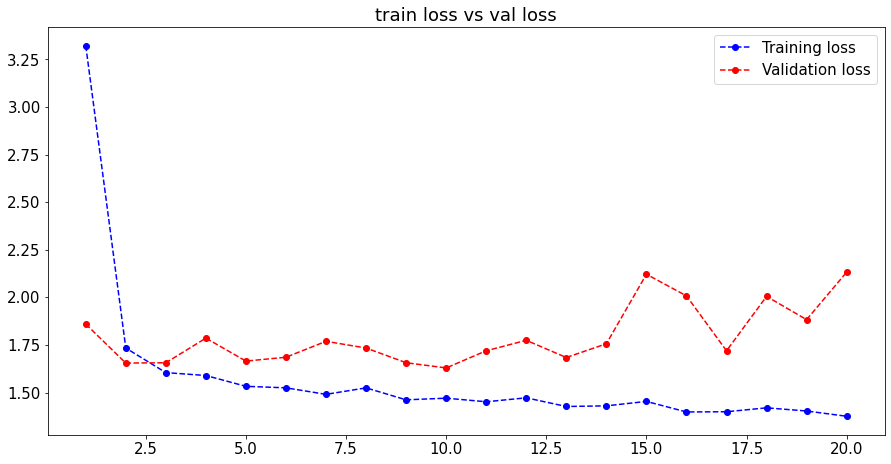

In [59]:
import matplotlib.pyplot as plt
plt.rc('font', size=15) 
fig = plt.figure(figsize=(15,7.5))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "ro--", label="Validation accuracy")
plt.title("train accuracy vs validation accuracy")
plt.legend()
plt.figure()
fig = plt.figure(figsize=(15,7.5))
plt.plot(epochs, loss, "bo--", label="Training loss")
plt.plot(epochs, val_loss, "ro--", label="Validation loss")
plt.title("train loss vs val loss")
plt.legend()
plt.show()

On remarque une différence assez nette avec le même modèle sans data augmentation. Aucun surapprentissage après 20 epochs. L'accuracy des données d'entraînement et celles de validation est très proche jusqu'au même nombre d'epochs.

In [60]:
!pip install keras-tuner -q

## Optimisation des hyperparamètres

Grâce au framework Keras tuner, il est possible d'optimiser les hyperparamètres de tout modèle afin d'obtenir les meilleures performances possibles en lui fournissant un certain choix de valeurs.

Nous allons optimiser, entre autres, le learning rate, le nombre d'unités des layers denses ainsi que le nombre de filtres des layers de convolutions.

In [68]:
# Optimisation du premier modèle testé

import kerastuner as kt

def build_model(hp):
    inputs = keras.Input(shape=(180, 180,3))
    x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(x)
    filter_nb = hp.Int(name="filter_nb", min_value=16, max_value=512, step=64)
    x = layers.Conv2D(filters=filter_nb, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    unit = hp.Int(name="unit", min_value=64, max_value=512, step=64)
    x = layers.Dense(unit)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(6, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.00001, 0.0005, 0.0005], ordered=False)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model


In [75]:
import kerastuner as kt
tuner = kt.BayesianOptimization(
build_model,
objective="val_accuracy",
max_trials=20,executions_per_trial=2,
directory="dogs_classifications",
overwrite=True)

In [76]:
callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]

In [77]:
tuner.search(train_dataset, batch_size=32, epochs=30, validation_data = val_dataset,
             callbacks=callbacks, verbose = 2)

Trial 20 Complete [00h 01m 26s]
val_accuracy: 0.41836734116077423

Best val_accuracy So Far: 0.44897960126399994
Total elapsed time: 00h 29m 14s


In [78]:
best_hps= tuner.get_best_hyperparameters()[0]

In [79]:
best_hps.values

{'filter_nb': 336, 'unit': 64, 'learning_rate': 0.0005}

In [80]:
# Fonction nous permettant d'obtenir la meilleure epoch du modèle

def get_best_epoch(hp):
    model = build_model(hp)
    callbacks=[
    keras.callbacks.EarlyStopping(
    monitor="val_loss", mode="min", patience=10)]
    
    history = model.fit(train_dataset, batch_size=32, epochs=30, validation_data = val_dataset,
             callbacks=callbacks, verbose = 2)
    val_loss_per_epoch = history.history["val_loss"]
    best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
    print(f"Best epoch: {best_epoch}")
    return best_epoch

In [81]:
best_model = get_best_epoch(best_hps)

Epoch 1/30
26/26 - 3s - loss: 3.1268 - accuracy: 0.2010 - val_loss: 1.8747 - val_accuracy: 0.2653
Epoch 2/30
26/26 - 2s - loss: 1.8859 - accuracy: 0.2829 - val_loss: 1.9083 - val_accuracy: 0.3163
Epoch 3/30
26/26 - 2s - loss: 1.6083 - accuracy: 0.3313 - val_loss: 1.5517 - val_accuracy: 0.3980
Epoch 4/30
26/26 - 2s - loss: 1.5477 - accuracy: 0.3449 - val_loss: 1.5149 - val_accuracy: 0.3673
Epoch 5/30
26/26 - 2s - loss: 1.5533 - accuracy: 0.3586 - val_loss: 1.5451 - val_accuracy: 0.3571
Epoch 6/30
26/26 - 2s - loss: 1.5422 - accuracy: 0.3660 - val_loss: 1.5128 - val_accuracy: 0.3673
Epoch 7/30
26/26 - 2s - loss: 1.5374 - accuracy: 0.3573 - val_loss: 1.5580 - val_accuracy: 0.3061
Epoch 8/30
26/26 - 2s - loss: 1.5344 - accuracy: 0.3834 - val_loss: 1.6791 - val_accuracy: 0.3571
Epoch 9/30
26/26 - 2s - loss: 1.5812 - accuracy: 0.3635 - val_loss: 1.5325 - val_accuracy: 0.3878
Epoch 10/30
26/26 - 2s - loss: 1.5312 - accuracy: 0.3635 - val_loss: 1.5197 - val_accuracy: 0.3571
Epoch 11/30
26/26 -

In [82]:
# On optimise un modèle plus profond cette fois
def build_model(hp):
    inputs = keras.Input(shape=(180, 180,3))
    x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(x)
    filter_nb = hp.Int(name="filter_nb", min_value=16, max_value=512, step=64)
    x = layers.Conv2D(filters=filter_nb, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    unit = hp.Int(name="unit", min_value=64, max_value=512, step=64)
    x = layers.Dense(unit)(x)
    drop_rate = hp.Choice(name='drop_rate', values=[0.5,0.6,0.7])
    x = layers.Dropout(drop_rate)(x)
    filter_nb = hp.Int(name="filter_nb", min_value=16, max_value=512, step=64)
    x = layers.Conv2D(filters=filter_nb, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    unit = hp.Int(name="unit", min_value=64, max_value=512, step=64)
    x = layers.Dense(unit)(x)
    drop_rate = hp.Choice(name='drop_rate', values=[0.5,0.6,0.7])
    x = layers.Dropout(drop_rate)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(6, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.00001, 0.0005, 0.0005], ordered=False)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model


    

In [83]:
import kerastuner as kt
tuner = kt.BayesianOptimization(
build_model,
objective="val_accuracy",
max_trials=20,executions_per_trial=2,
directory="dogs_classifications",
overwrite=True)

In [84]:
callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]

In [85]:
tuner.search(train_dataset, batch_size=32, epochs=30, validation_data = val_dataset,
             callbacks=callbacks, verbose = 2)

Trial 20 Complete [00h 04m 16s]
val_accuracy: 0.4336734712123871

Best val_accuracy So Far: 0.4540816396474838
Total elapsed time: 01h 08m 41s


On remarque un léger gain en terme d'accuracy par rapport au premier modèle moins profond. 